In [3]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
import numpy as np
import time
import pickle
import sys

### Porównanie modeli dla zadanych danych: zakładamy, że dysponujemy wektorem $\hat{y}$ różnych modeli

a) generacja macierzy błędu dla każdego modelu

In [4]:
X, y = ds.make_classification(n_samples=1000, n_features=15, n_classes=2)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
confusion_matrices = []
y_preds = []
for model in models:
    y_pred = cross_val_predict(model[1], X, y, cv=5)
    y_preds.append(y_pred)
    confusion_matrices.append(confusion_matrix(y, y_pred))
    
for model, conf_mat in zip(models, confusion_matrices):
    print(f'{model[0]}:\n{conf_mat}\n')

LR:
[[425  73]
 [ 58 444]]

LDA:
[[412  86]
 [ 60 442]]

KNN:
[[399  99]
 [ 97 405]]

CART:
[[434  64]
 [ 65 437]]

NB:
[[383 115]
 [ 75 427]]

SVM:
[[425  73]
 [ 61 441]]



b) wyliczenie i podanie "w tabelce" większości znanych metryk opartych o macierz błędu

In [5]:
target_names = [f'class {class_i}' for class_i in np.unique(y)]
for model, y_pred in zip(models, y_preds):
    print(f'{model[0]}:')
    print(classification_report(y, y_pred, target_names=target_names), '\n')

LR:
              precision    recall  f1-score   support

     class 0       0.88      0.85      0.87       498
     class 1       0.86      0.88      0.87       502

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000
 

LDA:
              precision    recall  f1-score   support

     class 0       0.87      0.83      0.85       498
     class 1       0.84      0.88      0.86       502

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000
 

KNN:
              precision    recall  f1-score   support

     class 0       0.80      0.80      0.80       498
     class 1       0.80      0.81      0.81       502

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000
 


c) na jednym wykresie przebiegi krzywej ROC dla tych modeli (kolory), legenda

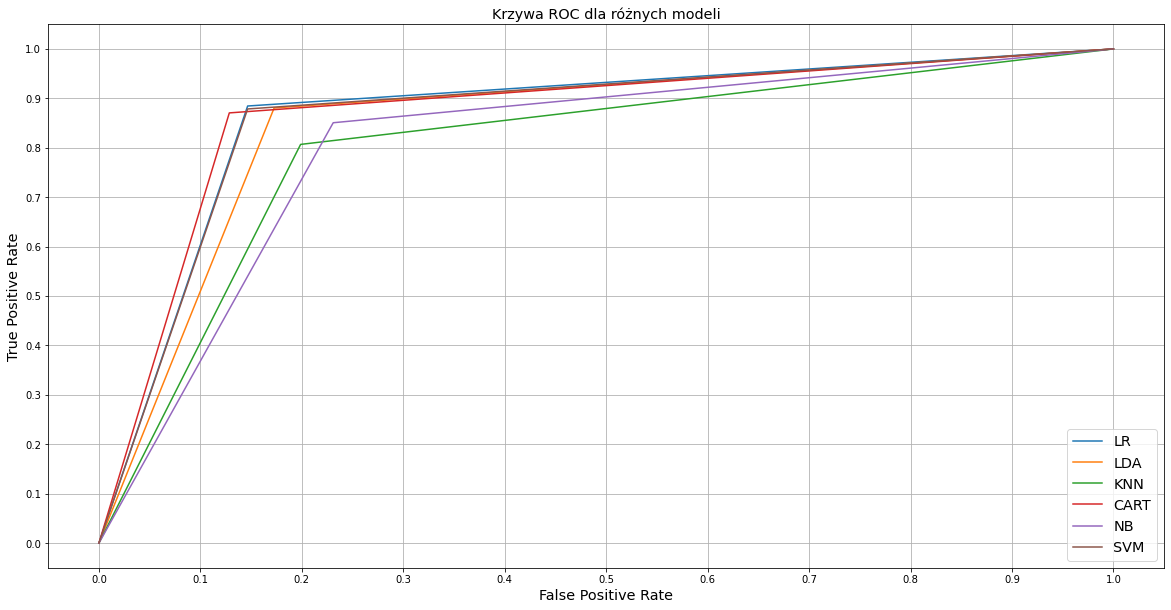

In [6]:
plt.rcParams["figure.figsize"] = (20, 10)
for model, y_pred in zip(models, y_preds):
    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(fpr, tpr, label=model[0])
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
plt.title('Krzywa ROC dla różnych modeli', fontsize='x-large')
plt.grid()
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

d) inne

- czas

In [7]:
X, y = ds.make_classification(n_samples=50000, n_features=20, n_classes=2)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
times = []

for model in models:
    start = time.time()
    model[1].fit(X, y)
    times.append(time.time() - start)
    
for model, time_el in zip(models, times):
    print(f'{model[0]}:\n{time_el}s\n')

LR:
0.03899741172790527s

LDA:
0.10200309753417969s

KNN:
0.003997325897216797s

CART:
2.081538677215576s

NB:
0.014004707336425781s

SVM:
25.296493768692017s



- rozmiary

In [8]:
sizes = []
for model in models:
    p = pickle.dumps(model[1])
    print(f'{model[0]}: {sys.getsizeof(p)/1000}kB')

LR: 0.859kB
LDA: 1.622kB
KNN: 8200.71kB
CART: 192.547kB
NB: 1.248kB
SVM: 1441.902kB
